### 线性回归房价预测

In [90]:
# 房价跟一些列有关系：面积、位置、房间布局……
import numpy as np

from sklearn import datasets

from sklearn.linear_model import LinearRegression

In [91]:
#### 加载数据
# boston = datasets.load_boston()
from sklearn.datasets import fetch_california_housing
boston = fetch_california_housing()
X = boston['data'] # 数据，这些数据影响了房价，统计指标
y = boston['target'] # 房价，24表示24万美金

# CRIM 犯罪
# NOX 空气污染
# TAX 税收
# 这些指标都和房价有关系
feature_names = boston['feature_names'] # 具体指标
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [92]:
boston

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

#### 数据查看

In [93]:
# 506表示506统计样本
# 影响房价的13个属性
X.shape

(20640, 8)

In [94]:
# 506个房子，对应着506价格
# X ---> y一一对应
# 数据--->目标值对应
y.shape

(20640,)

#### 数据拆分

In [95]:
# 506个数据、样本
# 拆分成两份：一份80%，训练数据；20%，验证数据
# 拿出其中的80%，交给算法，线性回归，学习、总结、拟合函数
# 20%，作用：验证，测一测，看看算法，学习80%结束，是否准确！
import numpy as np
index = np.arange(506)
np.random.shuffle(index)

train_index = index[:405]
test_index = index[405:]

In [96]:
# 80% 训练数据
X_train = X[train_index]
y_train = y[train_index]
display(X_train.shape,y_train.shape)

(405, 8)

(405,)

In [97]:
# 20% 测试数据
X_test = X[test_index]
y_test = y[test_index]

display(X_test.shape,y_test.shape)

(101, 8)

(101,)

#### 数据建模（model本质就是方程）

In [98]:
np.set_printoptions(suppress = True)

model = LinearRegression(fit_intercept = True)

# 如何构建，模：算法、方程
# 考试，做过的题
model.fit(X_train,y_train)

# 建模获取了斜率，有大有小，有正有负，表示什么？
# 正：正相关，面积，越大，房价越高
# 负：刚好相反，犯罪率，环境污染
display(model.coef_,model.intercept_)

# - `MedInc`: 中位数收入
# - `HouseAge`: 房屋年龄
# - `AveRooms`: 平均房间数
# - `AveBedrms`: 平均卧室数
# - `Population`: 人口数
# - `AveOccup`: 平均占用人数
# - `Latitude`: 纬度
# - `Longitude`: 经度

array([ 0.33307734, -0.00636192, -0.05525997, -0.3540851 ,  0.00015162,
       -0.00587625, 13.20148788,  5.3278504 ])

np.float64(153.69168853032158)

In [99]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

#### 模型验证、应用

In [100]:
# 模型预测结果：y_
y_ = model.predict(X_test).round(2)
y_[:30]

array([4.38, 0.72, 1.93, 3.29, 2.16, 1.39, 1.55, 1.6 , 3.8 , 2.36, 2.51,
       1.41, 1.52, 1.19, 1.61, 1.44, 3.6 , 1.85, 2.11, 1.25, 1.33, 1.85,
       1.31, 1.63, 1.95, 2.38, 2.51, 2.07, 1.29, 1.51])

In [101]:
y_test[:30]

array([4.305, 0.905, 1.51 , 3.271, 2.688, 1.469, 1.394, 1.094, 3.709,
       2.625, 1.969, 1.291, 1.089, 1.045, 1.373, 1.25 , 2.561, 1.4  ,
       1.577, 2.115, 1.279, 0.6  , 0.982, 2.438, 1.405, 0.75 , 2.291,
       1.647, 1.625, 1.214])

#### 模型评估

In [102]:
# 判断一下，训练数据 80%的数据的评分
# 为什么使用，训练数据，评分高？？？
# 做过题目，再次参加考试，分数高
model.score(X_train,y_train)

0.7131181991465523

In [103]:
# 最大值，是1，小于0
# 模型特别不好，那么评分可以是负数
# 这个指标越接近1，说明算法越优秀~
# 相当于，没见过题目，新题
model.score(X_test,y_test)

0.7511026311013401

$R^2 = 1 - \frac{u}{v}$

`u` is the residual sum of squares ``((y_true - y_pred)
** 2).sum()`


`v` is the total sum of squares ``((y_true -
y_true.mean()) ** 2).sum()``

In [104]:
y_pred = model.predict(X_test)
y_true = y_test

In [105]:
u = ((y_true - y_pred)**2).sum()
u 

np.float64(22.29612611119715)

In [106]:
v = ((y_true - y_true.mean())**2).sum()
v

np.float64(89.57959744554454)

In [107]:
1 - u/v

np.float64(0.7511026311013401)

In [108]:
# 最小二乘法
from sklearn.metrics import mean_squared_error

In [109]:
# 这个是测试数据，验证数据，表现，误差
# 对应那20%
mean_squared_error(y_true,y_pred)

np.float64(0.2207537238732391)

In [69]:
# 80% 训练，表现
mean_squared_error(y_train,model.predict(X_train))

np.float64(0.26810779542323177)

### 代码模拟梯度下降

In [110]:
import matplotlib.pyplot as plt

#### 构建函数和导函数

In [111]:
# 构建方程
f = lambda x : (x - 3.5)**2 - 4.5*x + 10

# 导函数
g = lambda x :2 * (x - 3.5) - 4.5

#### 函数可视化

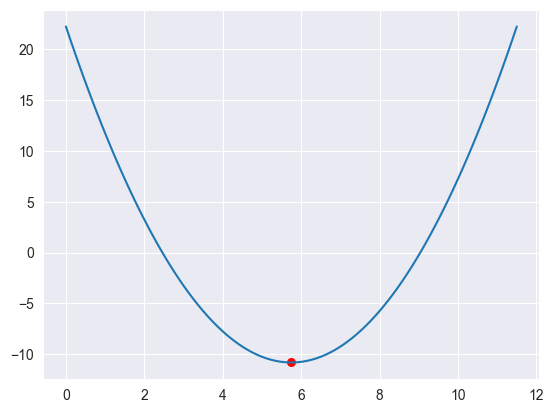

In [112]:
x = np.linspace(0,11.5,100)

y = f(x)

plt.plot(x,y)

plt.scatter(5.75,f(5.75),color = 'red',s = 30)

#### 求这个方程的最小值

如果有方程，那么使用方程求导，非常方便！

In [26]:
# 求导函数，令导函数为0，求解最小值对应的x值

In [27]:
# 2 * (x - 3.5) - 4.5
# 2*x - 11.5 = 0
# 2x = 11.5
# x = 5.75

#### 梯度下降（不能令方程的导函数为0，进行求解）

-----------------随机x是： 7
+++++++++++++++更新之后的x是： 6.25
+++++++++++++++更新之后的x是： 5.95
+++++++++++++++更新之后的x是： 5.83
+++++++++++++++更新之后的x是： 5.782
+++++++++++++++更新之后的x是： 5.7628
+++++++++++++++更新之后的x是： 5.75512
+++++++++++++++更新之后的x是： 5.752048
+++++++++++++++更新之后的x是： 5.7508192000000005
+++++++++++++++更新之后的x是： 5.75032768
+++++++++++++++更新之后的x是： 5.750131072
+++++++++++++++更新之后的x是： 5.7500524288
+++++++++++++++梯度下降次数： 11


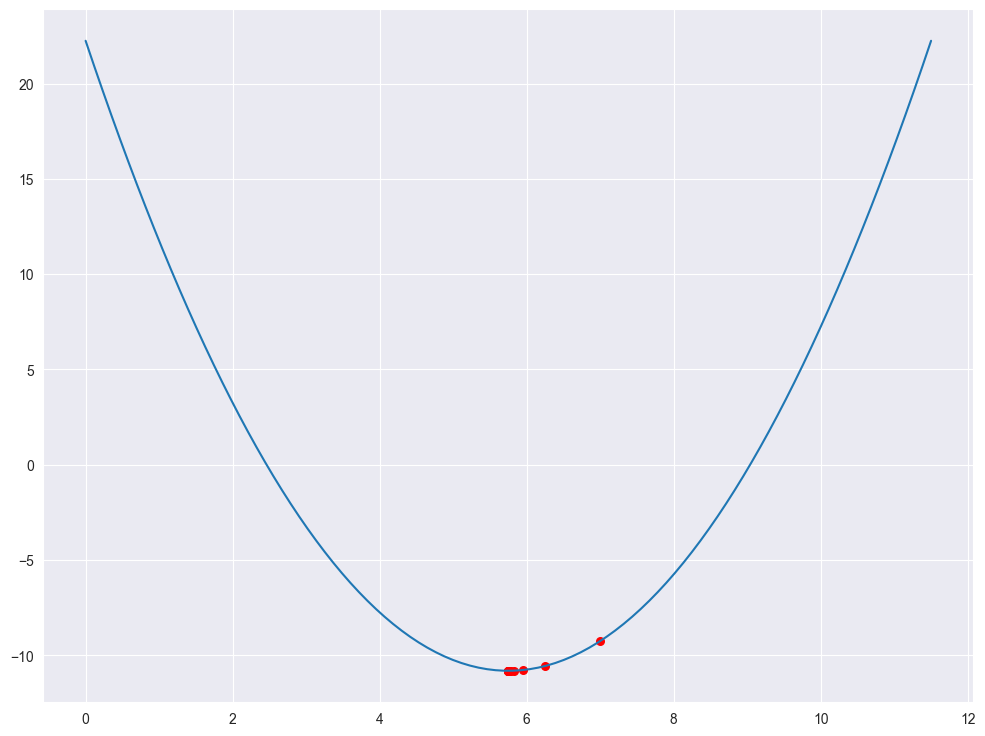

In [131]:
eta = 0.3 # 学习率

# 梯度下降5.749，算不算答案
# 5.7501
# 随机（瞎蒙）,初始值
x = np.random.randint(0,12,size = 1)[0]

# 多次while 循环，每次梯度下降，更新，记录一下上一次的值
# 比较，精确
# + 0.1；+ 0.2,；+ 1
# 一开始有差异，目的为了比较
last_x = x + 0.1

# 精确度
precision = 0.0001
print('-----------------随机x是：',x)

# 每次梯度下降，求解出来的x值，一开始随机给的
x_ = [x] # Python中列表
count = 0
while True:
    if np.abs(x - last_x) < precision: # 更新时，变化甚微，终止
        break
    # 更新，梯度下降
    # x是当前数值，赋值给上一个值
    last_x = x
    count += 1
    x = x - eta * g(x)
    x_.append(x)
    print('+++++++++++++++更新之后的x是：',x)
print('+++++++++++++++梯度下降次数：',count)

# x1是NumPy数组
x1 = np.linspace(0,11.5,100)
y1 = f(x1)
plt.figure(figsize=(12,9))
plt.plot(x1,y1)

# 散点图
x_ = np.array(x_)
plt.scatter(x_, f(x_),color = 'red',s = 30)